In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("C:\\Users\\ASUS\\Downloads\\amazon_sales_dataset.csv")
data=data[data.Store==1]
data=data[ data.Dept==1]
data=data.drop(["max","min","mean","median","std","Unnamed: 3","Type"],axis=1)
data=data.reset_index()
Q1 = np.percentile(data.Weekly_Sales, 25,
                interpolation = 'midpoint')
 
Q3 = np.percentile(data.Weekly_Sales, 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
    
 


# Upper bound
upper = np.where(data.Weekly_Sales >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data.Weekly_Sales <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
data=data.reset_index()
data["y"]=data.Weekly_Sales
data['Time'] = np.arange(len(data.Date))
data["date"] = pd.to_datetime(data.Date,format='%d/%m/%Y')
data["ds"]=data["date"].dt.strftime('%d/%m/%Y')
data.index=data.ds
data=data.drop(["Date"],axis=1)
data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11216\3975701143.py:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data.Weekly_Sales, 25,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11216\3975701143.py:11: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data.Weekly_Sales, 75,


,level_0,index,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,Total_MarkDown,y,Time,date,ds
ds,,,,,,,,,,,,,,,,,,,
05/02/2019,0,0,1,1,24924.50,151315,42.31,2.572,211.096358,8.106,0,2019,2,5,0.00,24924.50,0,2019-02-05,05/02/2019
26/02/2019,3,8759,1,1,19403.54,151315,46.63,2.561,211.319643,8.106,0,2019,2,8,0.00,19403.54,1,2019-02-26,26/02/2019
05/03/2019,4,12901,1,1,21827.90,151315,46.50,2.625,211.350143,8.106,0,2019,3,9,0.00,21827.90,2,2019-03-05,05/03/2019
12/03/2019,5,15145,1,1,21043.39,151315,57.79,2.667,211.380643,8.106,0,2019,3,10,0.00,21043.39,3,2019-03-12,12/03/2019
19/03/2019,6,16555,1,1,22136.64,151315,54.58,2.720,211.215635,8.106,0,2019,3,11,0.00,22136.64,4,2019-03-19,19/03/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28/09/2021,133,361146,1,1,18947.81,151315,76.08,3.666,222.981658,6.908,0,2021,9,39,9837.80,18947.81,113,2021-09-28,28/09/2021
05/10/2021,134,363002,1,1,21904.47,151315,68.55,3.617,223.181477,6.573,0,2021,10,40,15339.68,21904.47,114,2021-10-05,05/10/2021
12/10/2021,135,366639,1,1,22764.01,151315,62.99,3.601,223.381296,6.573,0,2021,10,41,8623.10,22764.01,115,2021-10-12,12/10/2021


In [2]:
df=data[["y","Time","date"]]

In [3]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11216\3808089464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11216\3808089464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11216\3808089464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [11]:
tr=df[:80]
test=df[80:]
tr

,y,Time,date,year,month,day
ds,,,,,,
05/02/2019,24924.50,0,2019-02-05,2019,2,5
26/02/2019,19403.54,1,2019-02-26,2019,2,26
05/03/2019,21827.90,2,2019-03-05,2019,3,5
12/03/2019,21043.39,3,2019-03-12,2019,3,12
19/03/2019,22136.64,4,2019-03-19,2019,3,19
...,...,...,...,...,...,...
07/10/2020,20797.58,75,2020-10-07,2020,10,7
14/10/2020,23077.55,76,2020-10-14,2020,10,14
21/10/2020,23351.80,77,2020-10-21,2020,10,21


In [17]:
tr_X=tr.drop(["y","Time","date"],axis=1)
tr_Y=tr.drop(["date","year","month","day","Time"],axis=1)
test_X=test.drop(["y","Time","date"],axis=1)
test_Y=test.drop(["date","year","month","day","Time"],axis=1)
df_X=df.drop(["y","Time","date"],axis=1)
df_Y=df.drop(["date","year","month","day","Time"],axis=1)
tr_X

,year,month,day
ds,,,
05/02/2019,2019,2,5
26/02/2019,2019,2,26
05/03/2019,2019,3,5
12/03/2019,2019,3,12
19/03/2019,2019,3,19
...,...,...,...
07/10/2020,2020,10,7
14/10/2020,2020,10,14
21/10/2020,2020,10,21


In [6]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit()
print(tscv)
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

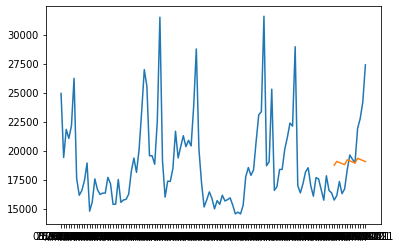

In [7]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# fit the model
my_lr = LinearRegression(fit_intercept=False)
my_lr.fit(tr_X,tr_Y)

# predict on the same period
preds =  my_lr.predict(test_X)

# plot what has been learned
plt.plot(df.index,df.y)
plt.plot(test.index, preds)




C:\Users\ASUS\AppData\Local\Temp\ipykernel_11216\3063843979.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  my_lr.fit(tr_X,tr_Y)


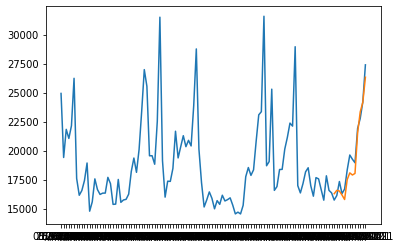

In [8]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# fit the model
my_lr = RandomForestRegressor()
my_lr.fit(tr_X,tr_Y)

# predict on the same period
preds =  my_lr.predict(test_X)

# plot what has been learned
plt.plot(df.index,df.y)
plt.plot(test.index, preds)

In [9]:
df_Y

,y
ds,
05/02/2019,24924.50
26/02/2019,19403.54
05/03/2019,21827.90
12/03/2019,21043.39
19/03/2019,22136.64
...,...
28/09/2021,18947.81
05/10/2021,21904.47
12/10/2021,22764.01


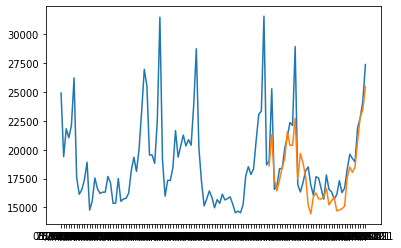

In [14]:
import xgboost as xgb
import matplotlib.pyplot as plt
# fit the model
my_lr = xgb.XGBRegressor()
my_lr.fit(tr_X,tr_Y)

# predict on the same period
preds =  my_lr.predict(test_X)

# plot what has been learned
plt.plot(df_X.index,df.y)
plt.plot(test_X.index, preds)